In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import retrieve_bond

0.0004437289045964299


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = retrieve_bond()
df.iloc[300:320, :]

,Date,df_1w,df_1m,df_2m,df_3m,df_6m,df_1y,df_2y
300,2023-08-30,1.43,1.71,1.71,1.75,1.70,1.94,1.125
301,2023-08-29,1.60,1.61,1.72,1.67,1.71,1.86,1.125
302,2023-08-28,1.60,1.61,1.68,1.67,1.71,1.86,1.178
303,2023-08-25,1.60,1.61,1.73,1.67,1.71,1.86,1.163
304,2023-08-24,1.60,1.61,1.68,1.67,1.71,1.86,1.126
305,2023-08-23,1.60,1.61,1.68,1.67,1.71,1.88,1.096
306,2023-08-22,1.43,1.75,1.65,1.72,1.75,1.97,1.150
307,2023-08-21,1.62,1.61,1.68,1.67,1.72,1.87,1.176
308,2023-08-18,1.47,1.49,1.66,1.68,1.75,1.94,1.151
309,2023-08-17,1.52,1.56,1.60,1.67,1.78,1.94,1.151


[1.56  1.56  1.61  1.58  1.56  1.6   1.098]
1.0038329631784288


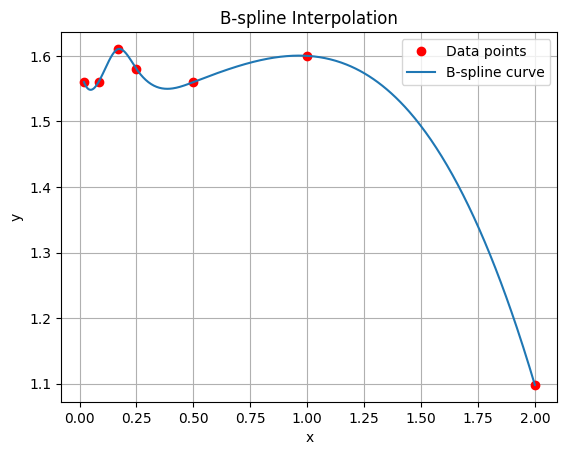

In [10]:
from scipy.interpolate import CubicSpline

def interpolate_rate(df, date):
    df_filter = df[df['Date']==date].drop(columns='Date')
    x = [1/52, 1/12, 2/12, 3/12, 6/12, 1, 2]
    y = df_filter.values.flatten()
    print(y)

    spline = CubicSpline(x, y)

    x_smooth = np.linspace(min(x), max(x), 504)
    y_smooth = spline(x_smooth)

    print(spline(0) / spline(1/252))


    plt.plot(x, y, 'o', label='Data points', color='red')
    plt.plot(x_smooth, y_smooth, label='B-spline curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('B-spline Interpolation')
    plt.grid(True)
    plt.show()

interpolate_rate(df, '2024-01-15')